# Neural Networks and Deep Learning 

## Chapter 1: Using neural nets to recognize handwritten digits

### Explanation of the Sigmoid Function:

The sigmoid function, also known as the logistic function, is a mathematical function that takes any real-valued number and maps it to a value between 0 and 1. It's defined as:

\begin{equation}
\sigma (x)=\dfrac{1}{1+e^{-x}}
\end{equation}

Where:
- $\sigma (x)$ is the sigmoid function
- $e$ is the base of the natural logarithm (Euler's number, approximately 2.71828)
- $x$ is the input value

The sigmoid function is often used in machine learning, particularly in neural networks, because of its useful properties:
- It's smooth and continuous
- It's bounded between 0 and 1
- It has a characteristic S-shaped curve
- Its derivative is easy to calculate, which is useful for training neural networks

## Python Function for Sigmoid:

Let's write a Python function to calculate the sigmoid:

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def sigmoid(z):
    """
    Calculates the sigmoid of x.
    
    Args:
    z (float): Input value
    
    Returns:
    float: Sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

In [3]:
def plot_sigmoid():
    """
    Creates and displays a plot of the sigmoid function.
    """
    x = np.linspace(-10, 10, 1000)
    y = [sigmoid(i) for i in x]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.title('Sigmoid Function')
    plt.xlabel('x')
    plt.ylabel('σ(x)')
    plt.grid(True)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.axhline(y=1, color='r', linestyle='--')
    plt.axvline(x=0, color='g', linestyle='--')
    plt.text(0, 0.5, '0.5', ha='left', va='center')
    plt.show()

x		Sigmoid(x)
-----------------------
-5		0.006693
-2		0.119203
-1		0.268941
0		0.500000
1		0.731059
2		0.880797
5		0.993307


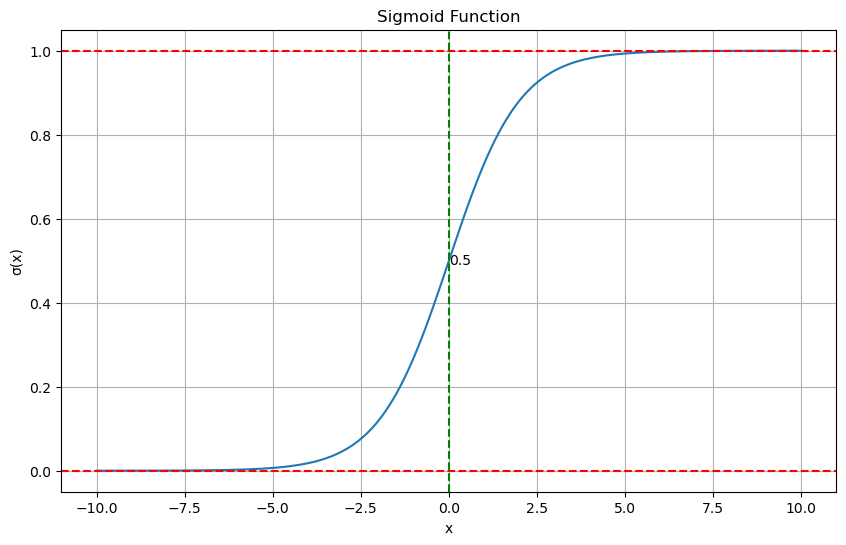

In [4]:
# Calculate some values
test_values = [-5, -2, -1, 0, 1, 2, 5]

print("x\t\tSigmoid(x)")
print("-----------------------")
for x in test_values:
    print(f"{x}\t\t{sigmoid(x):.6f}")

# Plot the sigmoid function
plot_sigmoid()

In [30]:
def linear_cost(X, y, theta):
    m = len(y)
    h = X * theta  # Use element-wise multiplication
    return 0.5 * np.mean((h - y) ** 2)

def logistic_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X * theta)  # Use element-wise multiplication
    return 0.5 * np.mean((h - y) ** 2)

In [47]:
# One input variable case
def plot_1d_cost():
    # Linear regression data (house size vs price)
    X_linear = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
    y_linear = np.array([250, 300, 480, 430, 630, 730])
    
    # Logistic regression data (tumor size vs malignant/benign)
    X_logistic = np.array([0, 1, 2, 3, 4, 5])
    y_logistic = np.array([0, 0, 0, 1, 1, 1])
    
    theta_range_linear = np.linspace(0, 500, 1000)
    theta_range_logistic = np.linspace(-5, 5, 1000)
    
    linear_costs = [linear_cost(X_linear, y_linear, t) for t in theta_range_linear]
    logistic_costs = [logistic_cost(X_logistic, y_logistic, t) for t in theta_range_logistic]
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(theta_range_linear, linear_costs)
    plt.title('Linear Regression Cost (1 input variable)')
    plt.xlabel('Weight (w)')
    plt.ylabel('Cost')
    
    plt.subplot(1, 2, 2)
    plt.plot(theta_range_logistic, logistic_costs)
    plt.title('Logistic Regression Cost (1 input variable)')
    plt.xlabel('Weight (w)')
    plt.ylabel('Cost')
    
    plt.tight_layout()
    plt.show()

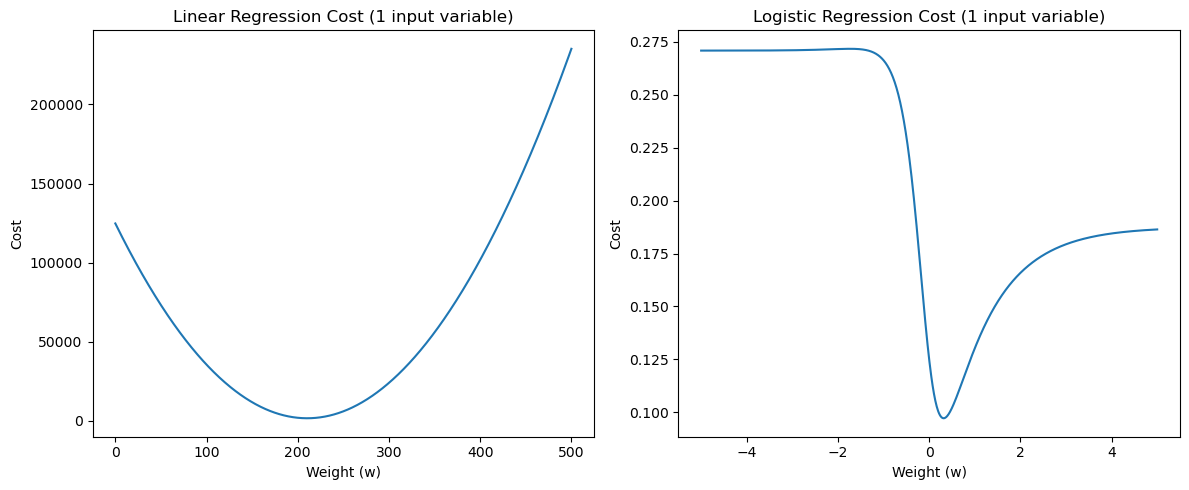

In [48]:
# Generate plots for one variable case
plot_1d_cost()

In [18]:
# Two input variables case
def plot_2d_cost():
    # Linear regression data (house size and bedrooms vs price)
    X_linear = np.array([[1, 1000, 2], [1, 1500, 3], [1, 2000, 3], [1, 2500, 4], [1, 3000, 4]])
    y_linear = np.array([200000, 250000, 300000, 350000, 400000])
    
    # Logistic regression data (tumor size and age vs malignant/benign)
    X_logistic = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
    y_logistic = np.array([0, 0, 0, 1, 1, 1])
    
    w1_range = np.linspace(-10, 10, 50)
    w2_range = np.linspace(-10, 10, 50)
    
    w1, w2 = np.meshgrid(w1_range, w2_range)
    
    linear_costs = np.zeros(w1.shape)
    logistic_costs = np.zeros(w1.shape)
    
    for i in range(w1.shape[0]):
        for j in range(w1.shape[1]):
            theta = np.array([0, w1[i,j], w2[i,j]])
            linear_costs[i,j] = linear_cost(X_linear, y_linear, theta)
            logistic_costs[i,j] = logistic_cost(X_logistic, y_logistic, theta)
    
    fig = plt.figure(figsize=(12, 5))
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(w1, w2, linear_costs)
    ax1.set_title('Linear Regression Cost (2 input variables)')
    ax1.set_xlabel('Weight 1 (w1)')
    ax1.set_ylabel('Weight 2 (w2)')
    ax1.set_zlabel('Cost')
    
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(w1, w2, logistic_costs)
    ax2.set_title('Logistic Regression Cost (2 input variables)')
    ax2.set_xlabel('Weight 1 (w1)')
    ax2.set_ylabel('Weight 2 (w2)')
    ax2.set_zlabel('Cost')
    
    plt.tight_layout()
    plt.show()

/var/folders/c4/d9khc7ks6w3g6jwnggf0dj400000gp/T/ipykernel_35170/3340889349.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


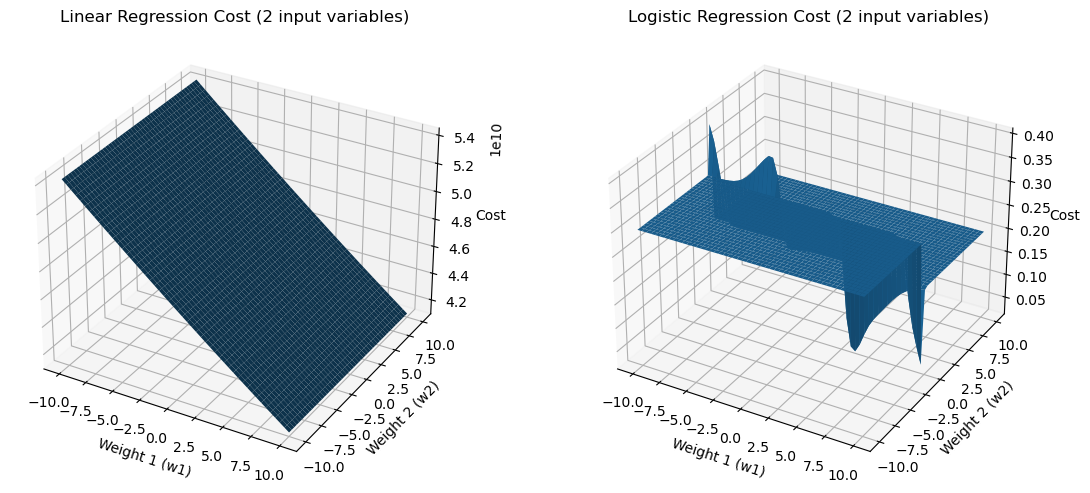

In [16]:
# Generate plots for two-variable case
plot_2d_cost()

1. One input variable case:
   - For linear regression: We use house size to predict house price.
   - For logistic regression: We use tumor size to predict if a tumor is malignant (1) or benign (0).
   - The plots show how the cost changes as we vary the weight for the single input variable.

2. Two input variables case:
   - For linear regression: We use house size and number of bedrooms to predict house price.
   - For logistic regression: We use tumor size and patient's age to predict if a tumor is malignant (1) or benign (0).
   - The 3D plots show how the cost changes as we vary both weights (w1 and w2).

Key observations from these plots:

1. One input variable case:
   - The linear regression cost function will show a smooth, convex parabola.
   - The logistic regression cost function, using squared error, will show a non-convex curve.

2. Two input variables case:
   - The linear regression cost surface will be a smooth, convex bowl shape.
   - The logistic regression cost surface will be more complex and non-convex.

These plots clearly illustrate why the squared error cost function is problematic for logistic regression:

1. For linear regression, the cost function remains convex in both cases, ensuring that gradient descent can easily find the global minimum.

2. For logistic regression, the cost function is non-convex when using squared error. This can lead to:
   - Multiple local minima
   - Plateau regions where the gradient is close to zero
   - Difficulty in finding the global optimum using gradient-based methods

This visualization effectively demonstrates why different cost functions are used for different types of regression problems, and specifically why the squared error cost function is not suitable for logistic regression.